In [91]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns  ## This will be for the prettier confusion matrix vis
from sklearn.metrics import confusion_matrix
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import accuracy_score


In [92]:
MyData=pd.read_csv(r'D:\YT\YTpaper\insiderinformedcyber\GPU\CSCI\oil_prediction_final.csv')
MyData.head()

,Unnamed: 0,date,value,GPRD,GPRD_ACT,GPRD_THREAT,daily_policy_index,sprtrn,spindx,oil_return
0,0,2000-01-04,25.56,93.751915,116.829170,71.461182,109.31,-0.038345,1399.42,-0.007825
1,1,2000-01-05,24.65,47.565075,47.418663,56.502644,123.22,0.001922,1402.11,-0.036917
2,2,2000-01-06,24.79,52.012840,51.852737,59.469170,53.61,0.000956,1403.45,0.005647
3,3,2000-01-07,24.79,41.667515,41.539261,54.446617,42.03,0.027090,1441.47,0.000000
4,4,2000-01-10,24.71,65.595398,58.127548,72.726173,44.18,0.011190,1457.60,-0.003238


In [93]:
MyData=MyData.drop(['Unnamed: 0'],axis=1)

In [94]:
confidence_level = 0.05
MyData['VaR_5_percent'] = MyData['oil_return'].rolling(window=10).quantile(confidence_level)

In [95]:
MyData['return_lag_1'] = MyData['oil_return'].shift(1)
MyData['return_lag_2'] = MyData['oil_return'].shift(2)
MyData['return_lag_3'] = MyData['oil_return'].shift(3)


In [96]:
MyData['VaR_5_percent_lag1'] = MyData['VaR_5_percent'].shift(1)
MyData['VaR_5_percent_lag2'] = MyData['VaR_5_percent'].shift(2)
MyData['VaR_5_percent_lag3'] = MyData['VaR_5_percent'].shift(3)

In [97]:
MyData.dropna(inplace=True)

In [98]:
X = MyData.drop(['oil_return','date','value','spindx','GPRD','VaR_5_percent','VaR_5_percent_lag1','VaR_5_percent_lag2','VaR_5_percent_lag3'], axis= 1)
scaler = StandardScaler()
X=scaler.fit_transform(X)

In [99]:
X_var = MyData.drop(['oil_return','date','value','spindx','GPRD','VaR_5_percent','return_lag_1','return_lag_2','return_lag_3'], axis= 1)
scaler = StandardScaler()
X_var=scaler.fit_transform(X_var)

In [100]:
Y=MyData['oil_return']
Y_var=MyData['VaR_5_percent']

In [101]:
threshold = np.median(Y)
threshold_var=np.median(Y_var)

In [102]:
Y_binary = (Y> threshold).astype(int)
Y_binary_var=(Y_var> threshold_var).astype(int)

In [103]:
print(X_var.shape)
print(X.shape)
print(Y_var.shape)
print(Y.shape)

(6001, 7)
(6001, 7)
(6001,)
(6001,)


In [104]:
x_train,x_test,y_train,y_test = train_test_split(X,Y_binary,test_size =0.3)
x_train_var,x_test_var,y_train_var,y_test_var = train_test_split(X_var,Y_binary_var,test_size =0.3)
print(x_train.shape)
print(y_train.shape)
print(x_train_var.shape)
print(y_train_var.shape)

(4200, 7)
(4200,)
(4200, 7)
(4200,)


In [105]:
MyLR = LogisticRegression()

In [106]:
MyMN = MultinomialNB()

In [107]:
My_LR_Model=MyLR.fit(x_train, y_train)
MyModelPredictions=My_LR_Model.predict(x_test)
print(MyModelPredictions)

[1 0 0 ... 1 1 0]


In [73]:
My_MN_Model = MyMN.fit(x_train, y_train)
Predictions_MN=My_MN_Model.predict(x_test)
print(Predictions_MN)

d:\YT\YTpaper\insiderinformedcyber\GPU\myenv\lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ValueError: Negative values in data passed to MultinomialNB (input X)

In [108]:
from sklearn.preprocessing import MinMaxScaler


In [109]:
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x_train)
x_scaled_var=scaler.fit_transform(x_train_var)
x_scaled_test = scaler.fit_transform(x_test)
x_scaled_test_var=scaler.fit_transform(x_test_var)

In [110]:
My_MN_Model = MyMN.fit(x_scaled, y_train)
Predictions_MN=My_MN_Model.predict(x_scaled_test)
print(Predictions_MN)

[0 0 0 ... 0 0 0]


In [111]:
My_MN_var_Model = MyMN.fit(x_scaled_var, y_train)
Predictions_MN_var=My_MN_var_Model.predict(x_scaled_test_var)
print(Predictions_MN_var)

[0 0 0 ... 0 0 0]


In [112]:
MyLR_var = LogisticRegression()

In [113]:
My_LR_var_Model=MyLR_var.fit(x_train_var, y_train_var)
MyModelPredictions_var=My_LR_var_Model.predict(x_test_var)
print(MyModelPredictions_var)

[0 0 0 ... 0 1 1]


In [114]:
MyCM=confusion_matrix(y_test, MyModelPredictions)
print(MyCM)


[[507 384]
 [422 488]]


In [115]:
MyCM_MN=confusion_matrix(y_test, Predictions_MN)
print(MyCM_MN)

[[891   0]
 [910   0]]


In [116]:
print(My_LR_Model.score(x_train, y_train))

0.5704761904761905


In [117]:
print(My_LR_var_Model.score(x_train_var, y_train_var))

0.9245238095238095


In [151]:
print(My_MN_Model.score(x_scaled, y_train))

0.5047619047619047


In [152]:
print(My_MN_var_Model.score(x_scaled_var, y_train_var))

0.4907142857142857


<Axes: >

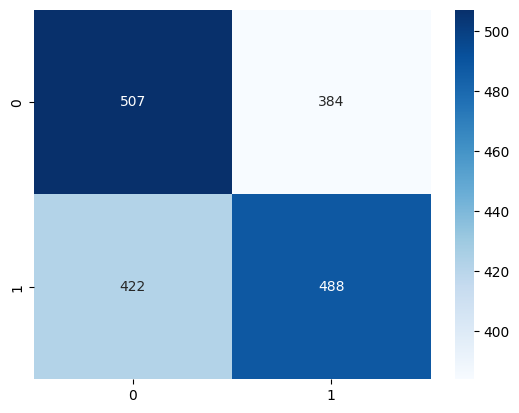

In [121]:
sns.heatmap(MyCM, annot=True,fmt='g' , cmap='Blues')

<Axes: >

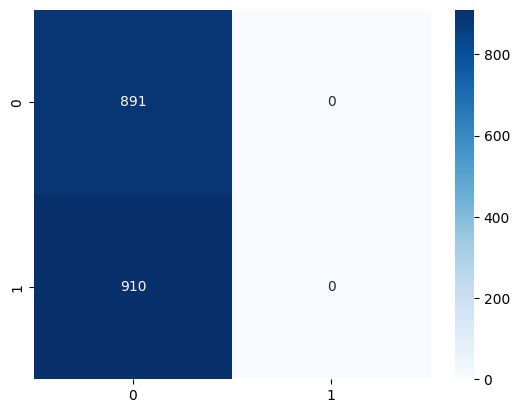

In [153]:
sns.heatmap(MyCM_MN, annot=True,fmt='g' , cmap='Blues')

In [123]:
MyCM_var=confusion_matrix(y_test_var, MyModelPredictions_var)
print(MyCM_var)

[[803  82]
 [ 68 848]]


In [124]:
MyCM_var_MN=confusion_matrix(y_test_var, Predictions_MN_var)
print(MyCM_var_MN)

[[856  29]
 [911   5]]


<Axes: >

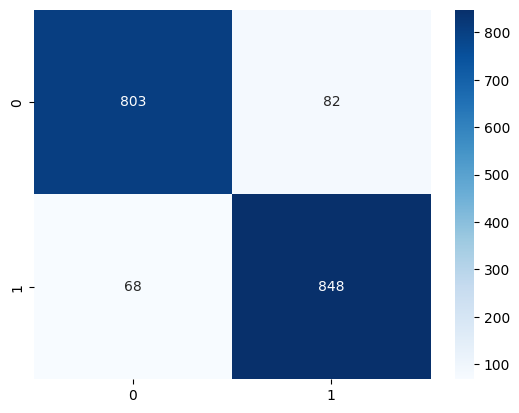

In [125]:

sns.heatmap(MyCM_var, annot=True,fmt='g' , cmap='Blues')

<Axes: >

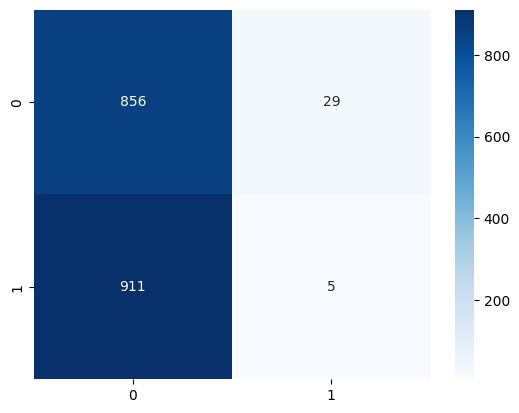

In [126]:
sns.heatmap(MyCM_var_MN, annot=True,fmt='g' , cmap='Blues')

In [127]:
print(My_LR_var_Model.score(x_train_var, y_train_var))

0.9245238095238095


In [128]:
print(My_LR_Model.predict_proba(x_test))

[[0.41561969 0.58438031]
 [0.55143236 0.44856764]
 [0.51423871 0.48576129]
 ...
 [0.47980328 0.52019672]
 [0.46778432 0.53221568]
 [0.50670991 0.49329009]]


In [34]:
print(My_LR_var_Model.predict_proba(x_test_var))

[[0.50525517 0.49474483]
 [0.49394633 0.50605367]
 [0.5385037  0.4614963 ]
 ...
 [0.49971208 0.50028792]
 [0.5084815  0.4915185 ]
 [0.43454428 0.56545572]]


In [129]:
## print the coefficients (the weights) of the model
print(My_LR_Model.coef_)

[[-0.07755975  0.00697368  0.0158246   0.36925113  0.01624439  0.03438247
   0.02697389]]


In [130]:
print(My_LR_var_Model.coef_)

[[-0.11542811 -0.02424307  0.04855835  0.05903083  6.80262017  0.03926508
  -0.11416729]]


In [131]:
## print the intercept (b) for the model
print(My_LR_Model.intercept_)

[-0.01676987]


In [132]:
print(My_LR_var_Model.intercept_)

[-1.25395395]


In [133]:

x_train=np.array(x_train)
y_train = np.transpose([y_train])
x_test=np.array(x_test)
y_test= np.transpose([y_test])


In [134]:
x_train_var=np.array(x_train_var)
y_train_var = np.transpose([y_train_var])
x_test_var=np.array(x_test_var)
y_test_var = np.transpose([y_test_var])

In [135]:
print(x_train.shape)

(4200, 7)


In [136]:
w = np.array([[1,1,1,1,1,1,1]])
b = 0
print(w)
print(w.shape)

[[1 1 1 1 1 1 1]]
(1, 7)


In [137]:
print(x_train_var.shape)

(4200, 7)


In [138]:
w_var = np.array([[1,1,1,1,1,1,1]])
b_var = 0
print(w_var)
print(w_var.shape)

[[1 1 1 1 1 1 1]]
(1, 7)


In [139]:
z = (x_train @ w.T) + b
print("z = (X @ w.T) + b\n", z)
print("The shape of z is\n", z.shape)

z = (X @ w.T) + b
 [[ 0.49404043]
 [ 6.07221422]
 [-3.07595888]
 ...
 [ 1.40469887]
 [ 0.22225946]
 [ 1.28157891]]
The shape of z is
 (4200, 1)


In [140]:
z_var = (x_train_var @ w_var.T) + b_var
print("z = (X @ w.T) + b\n", z)
print("The shape of z is\n", z.shape)

z = (X @ w.T) + b
 [[ 0.49404043]
 [ 6.07221422]
 [-3.07595888]
 ...
 [ 1.40469887]
 [ 0.22225946]
 [ 1.28157891]]
The shape of z is
 (4200, 1)


In [141]:
def Sigmoid(s, deriv=False):
    if deriv:
        return s * (1 - s)
    return 1 / (1 + np.exp(-s))

In [142]:
print("Sigmoid(2):", Sigmoid(2)) 

Sigmoid(2): 0.8807970779778823


In [143]:
S_z = Sigmoid(z)
print("S(z) is\n", S_z)

S(z) is
 [[0.62105779]
 [0.99769924]
 [0.04410989]
 ...
 [0.80292847]
 [0.55533725]
 [0.78271842]]


In [144]:
S_z_var = Sigmoid(z_var)
print("S(z_var) is\n", S_z_var)

S(z_var) is
 [[0.99884806]
 [0.35874138]
 [0.19342401]
 ...
 [0.7858496 ]
 [0.62034645]
 [0.9956477 ]]


In [172]:
##Note that S_z here is the same as y^
## It is the output of the logistic regression
y_hat = S_z

In [ ]:
y_hat_var = S_z_var

In [145]:
AllError_LCE=[]
LR=1
epochs = 200
for i in range(epochs):
    print("Epoch \n", i)
    z = (x_train @ w.T) + b
    print("The z here is\n", z)
    y_hat=Sigmoid(z)
    Z1=(y_train*np.log(y_hat)) + ((1 - y_train)*np.log(1 - y_hat))
    LCE = -(np.sum(Z1))/len(y_train)
    AllError_LCE.append(LCE)
    error = y_hat-y_train
    print(error)
    dL_dw = (1/len(y_train)) * np.transpose(error) @ x_train
    print(dL_dw)
    b1=(1/len(y_train))*(error)
    print(b1)
    ## Now get the mean of this vector
    dL_db=np.average(b1)
    print(dL_db)
    ## Use the gradient to update w and b
    w = w - (LR * dL_dw)
    b = b - (LR * dL_db)
    print(w)
    y_pred = (y_hat >= 0.5).astype(int)
    accuracy = np.mean(y_pred == y_train)
    print(f"trainset_accuracy：{accuracy}")
    z_test = (x_test @ w.T) + b
    y_hat_test = Sigmoid(z_test)
    y_pred_test = (y_hat_test >= 0.5).astype(int)
    test_accuracy = np.mean(y_pred_test == y_test)
    print(f"test_accuracy：{test_accuracy:.4f}")

Epoch 
 0
The z here is
 [[ 0.49404043]
 [ 6.07221422]
 [-3.07595888]
 ...
 [ 1.40469887]
 [ 0.22225946]
 [ 1.28157891]]
[[-0.37894221]
 [-0.00230076]
 [ 0.04410989]
 ...
 [-0.19707153]
 [ 0.55533725]
 [ 0.78271842]]
[[0.1293578  0.16265383 0.12791141 0.05236943 0.01942059 0.01490203
  0.01604805]]
[[-9.02243354e-05]
 [-5.47798987e-07]
 [ 1.05023553e-05]
 ...
 [-4.69217931e-05]
 [ 1.32223155e-04]
 [ 1.86361529e-04]]
-1.0001663182763081e-05
[[0.8706422  0.83734617 0.87208859 0.94763057 0.98057941 0.98509797
  0.98395195]]
trainset_accuracy：0.5345238095238095
test_accuracy：0.5197
Epoch 
 1
The z here is
 [[ 0.47060911]
 [ 5.36392644]
 [-2.70045118]
 ...
 [ 1.51564721]
 [ 0.23694572]
 [ 1.17400999]]
[[-0.38447209]
 [-0.00466066]
 [ 0.06294674]
 ...
 [-0.18010338]
 [ 0.55896083]
 [ 0.76386907]]
[[0.12283114 0.14976818 0.11883677 0.05261967 0.02012125 0.01574165
  0.01661374]]
[[-9.15409729e-05]
 [-1.10968119e-06]
 [ 1.49873186e-05]
 ...
 [-4.28817582e-05]
 [ 1.33085913e-04]
 [ 1.81873589e-

C:\Users\36310\AppData\Local\Temp\ipykernel_28776\575311739.py:9: RuntimeWarning: divide by zero encountered in log
  Z1=(y_train*np.log(y_hat)) + ((1 - y_train)*np.log(1 - y_hat))
C:\Users\36310\AppData\Local\Temp\ipykernel_28776\575311739.py:9: RuntimeWarning: invalid value encountered in multiply
  Z1=(y_train*np.log(y_hat)) + ((1 - y_train)*np.log(1 - y_hat))


trainset_accuracy：0.5683333333333334
test_accuracy：0.5519
Epoch 
 192
The z here is
 [[ 0.09030716]
 [ 0.39880672]
 [-0.10967091]
 ...
 [ 0.78408463]
 [-0.01448887]
 [ 0.36748877]]
[[-0.47743854]
 [-0.40159907]
 [ 0.47260972]
 ...
 [-0.31344022]
 [ 0.49637785]
 [ 0.59085204]]
[[ 1.07396249e-08 -2.37979521e-08  5.00258587e-08 -1.74262175e-08
  -1.22879583e-06  3.29360671e-06 -1.13099793e-06]]
[[-1.13675843e-04]
 [-9.56188266e-05]
 [ 1.12526124e-04]
 ...
 [-7.46286246e-05]
 [ 1.18185201e-04]
 [ 1.40679057e-04]]
9.565422819520837e-07
[[-0.07695528  0.00689535  0.01619492  0.36937845  0.01611133  0.03520475
   0.02684998]]
trainset_accuracy：0.5683333333333334
test_accuracy：0.5519
Epoch 
 193
The z here is
 [[ 0.09030472]
 [ 0.39880972]
 [-0.10967158]
 ...
 [ 0.78408   ]
 [-0.01449006]
 [ 0.36748788]]
[[-0.47743915]
 [-0.40159835]
 [ 0.47260955]
 ...
 [-0.31344122]
 [ 0.49637755]
 [ 0.59085182]]
[[ 1.09108848e-08 -2.16744220e-08  4.81967370e-08 -1.72490361e-08
  -1.14345018e-06  3.06860827e

In [146]:
AllError_LCE_var=[]
LR=1
epochs_var = 200
for i in range(epochs_var):
    print("Epoch \n", i)
    z_var = (x_train_var@ w_var.T) + b_var
    print("The z_var here is\n", z_var)
    y_hat_var=Sigmoid(z_var)
    Z1_var=(y_train_var*np.log(y_hat_var)) + ((1 - y_train_var)*np.log(1 - y_hat_var))
    LCE_var = -(np.sum(Z1_var))/len(y_train_var)
    AllError_LCE_var.append(LCE_var)
    error_var = y_hat_var-y_train_var
    print(error_var)
    dL_dw_var = (1/len(y_train_var)) * np.transpose(error_var) @ x_train_var
    print(dL_dw_var)
    b1_var=(1/len(y_train_var))*(error_var)
    print(b1_var)
    ## Now get the mean of this vector
    dL_db_var=np.average(b1_var)
    print(dL_db_var)
    ## Use the gradient to update w and b
    w_var = w_var - (LR * dL_dw_var)
    b_var = b_var - (LR * dL_db_var)
    print(w_var)
    y_pred_var = (y_hat_var >= 0.5).astype(int)
    accuracy_var = np.mean(y_pred_var == y_train_var)
    print(f"trainset_accuracy：{accuracy_var}")
    z_test_var = (x_test_var @ w_var.T) + b_var
    y_hat_test_var = Sigmoid(z_test_var)
    y_pred_test_var = (y_hat_test_var >= 0.5).astype(int)
    test_accuracy_var = np.mean(y_pred_test_var == y_test_var)
    print(f"test_accuracy：{test_accuracy_var:.4f}")

Epoch 
 0
The z_var here is
 [[ 6.76515857]
 [-0.58083111]
 [-1.42791337]
 ...
 [ 1.30008686]
 [ 0.491019  ]
 [ 5.43268941]]
[[-0.00115194]
 [ 0.35874138]
 [ 0.19342401]
 ...
 [-0.2141504 ]
 [-0.37965355]
 [-0.0043523 ]]
[[ 0.13211035  0.15220047  0.09960966  0.10332119 -0.09719329 -0.07290331
  -0.05912117]]
[[-2.74270505e-07]
 [ 8.54146136e-05]
 [ 4.60533364e-05]
 ...
 [-5.09881903e-05]
 [-9.03937018e-05]
 [-1.03626153e-06]]
7.1497855968038e-06
[[0.86788965 0.84779953 0.90039034 0.89667881 1.09719329 1.07290331
  1.05912117]]
trainset_accuracy：0.7359523809523809
test_accuracy：0.7646
Epoch 
 1
The z_var here is
 [[ 6.39239307]
 [-1.56242634]
 [-1.36407851]
 ...
 [ 1.36839008]
 [ 0.61029192]
 [ 4.99403032]]
[[-0.00167145]
 [ 0.17329876]
 [ 0.20357824]
 ...
 [-0.20288008]
 [-0.35199261]
 [-0.00673265]]
[[ 0.11749364  0.13337851  0.08740054  0.09243284 -0.07958697 -0.05535004
  -0.0416907 ]]
[[-3.97963430e-07]
 [ 4.12616093e-05]
 [ 4.84710089e-05]
 ...
 [-4.83047806e-05]
 [-8.38077641e-0

The predicted w is 
 [[-0.07695537  0.00689546  0.01619462  0.36937857  0.01611785  0.03518719
   0.02685618]]
The predicted b is
 -9.485207347281784e-05


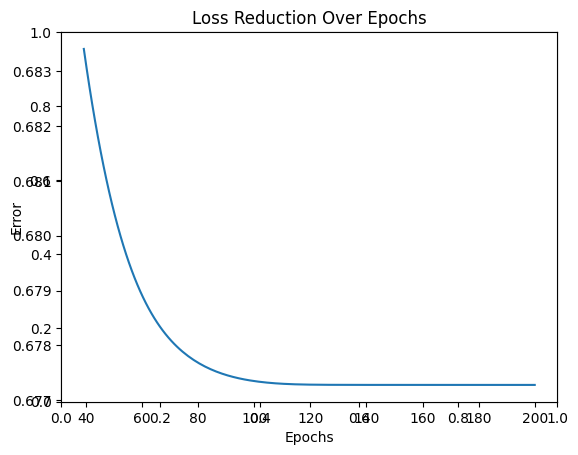

In [147]:
import matplotlib.pyplot as plt
#print(len(AllError_LCE))
##Plot the change in Loss over epochs
fig1 = plt.figure()
plt.title("Loss Reduction Over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Error")
ax = plt.axes()
x = np.linspace(0, epochs, epochs) #start, stop, how many 
#print(x.shape)
ax.plot(x, AllError_LCE)    

print("The predicted w is \n", w)
print("The predicted b is\n",b)

The predicted w_var is 
 [[-0.10058597 -0.04298195  0.17062435  0.02143931  3.75966954  0.80534424
  -0.10291813]]
The predicted b_var is
 -0.004010030783709343


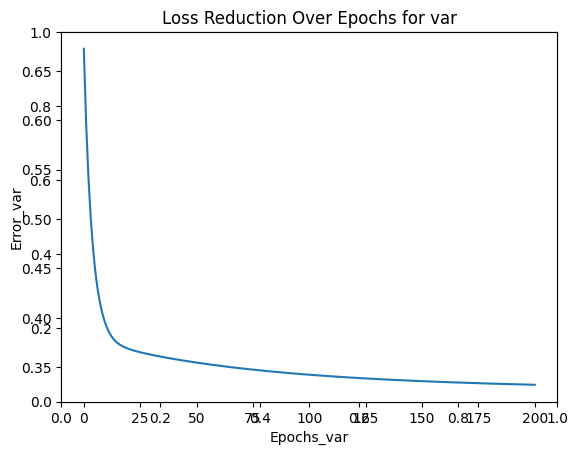

In [148]:
import matplotlib.pyplot as plt
#print(len(AllError_LCE))
##Plot the change in Loss over epochs
fig_var = plt.figure()
plt.title("Loss Reduction Over Epochs for var")
plt.xlabel("Epochs_var")
plt.ylabel("Error_var")
ax = plt.axes()
x = np.linspace(0, epochs_var, epochs_var) #start, stop, how many 
#print(x.shape)
ax.plot(x, AllError_LCE_var)    

print("The predicted w_var is \n", w_var)
print("The predicted b_var is\n",b_var)

In [176]:
print(AllError_LCE)

[nan, 1.1661656165070458, 1.0222556759662376, 0.9060138295369498, 0.8188440514980184, 0.7594313403520304, 0.7235560545273215, 0.7044790951381822, 0.6948540706316192, 0.689641266730613, 0.6864938003630844, 0.684467578299164, 0.6831266701022968, 0.682226488402442, 0.681615046325362, 0.6811944619443521, 0.6809010249765807, 0.680693090824865, 0.6805433217470116, 0.6804336603279183, 0.6803520767444184, 0.6802904692670577, 0.6802433105965362, 0.6802067741783512, 0.6801781684949915, 0.6801555688165679, 0.6801375757092555, 0.6801231551723285, 0.680111531604426, 0.6801021151936751, 0.6800944519328735, 0.6800881886610366, 0.6800830482071136, 0.680078811419729, 0.6800753039623001, 0.6800723864594662, 0.6800699470397469, 0.6800678956200474, 0.6800661594766877, 0.6800646797809392, 0.6800634088675426, 0.6800623080670115, 0.6800613459761351, 0.6800604970721051, 0.6800597405981184, 0.6800590596647682, 0.6800584405238292, 0.6800578719803185, 0.680057344915837, 0.6800568519016962, 0.6800563868846382, 0.

In [149]:
Prediction=Sigmoid((x_test @ w.T) + b)
Prediction[Prediction >= .5] = 1
Prediction[Prediction < .5] = 0
Prediction_accuracy = np.mean(Prediction == y_test)
print(Prediction_accuracy)

0.5519156024430871


In [150]:
Prediction_var=Sigmoid((x_test_var @ w_var.T) + b_var)
Prediction_var[Prediction_var >= .5] = 1
Prediction_var[Prediction_var < .5] = 0
Prediction_accuracy_var = np.mean(Prediction_var == y_test_var)
print(Prediction_accuracy_var)

0.8395335924486397
